In [84]:
import pandas as pd
import numpy as np
import os, glob

import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
mypath = os.getcwd()

In [86]:
customers = pd.read_csv(mypath+'/data/customers.csv', delimiter = '|')

In [87]:
customers.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num,profile
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Vernal,UT,84078,40.610864,-109.766137,25851,Accounting technician,1969-10-03,888022315787,adults_50up_male_urban.json
1,715-55-5575,4351161559407816183,Edward,Fuller,M,310 Kendra Common Apt. 164,Huntington Beach,CA,92648,33.683229,-118.018466,190249,Professor Emeritus,1970-06-07,917558277935,adults_50up_male_urban.json
2,167-48-5821,4192832764832,Melinda,Cameron,F,05641 Robin Port,Oakland,CA,94607,37.612145,-122.445557,381459,International aid/development worker,1975-05-30,718172762479,adults_2550_female_urban.json
3,406-83-7518,4238849696532874,Ann,Williams,F,26916 Carlson Mountain,Sewell,NJ,8080,39.647560,-75.309733,37433,Seismic interpreter,1978-12-26,947268892251,adults_2550_female_urban.json
4,697-93-1877,4514627048281480,Lee,Hernandez,M,809 Burns Creek,Laredo,TX,78046,27.454567,-99.195694,248858,Medical laboratory scientific officer,1970-05-22,888335239225,adults_50up_male_urban.json


In [88]:
len(customers)

1000

In [89]:
static_merchants = pd.read_csv(mypath+'/data/merchants_static.csv', delimiter = '|')

In [90]:
static_merchants.describe()

,lat,long,fraud_risk
count,15328.000000,15328.000000,15328.000000
mean,37.639488,-91.982145,0.044624
std,5.053562,16.208640,0.206484
min,20.979489,-158.184022,0.000000
25%,33.937703,-98.196018,0.000000
50%,38.437235,-87.296578,0.000000
75%,41.069620,-80.039000,0.000000
max,61.553145,-69.267879,1.000000


In [91]:
len(static_merchants)

15328

In [92]:
len(static_merchants[static_merchants['fraud_risk'] == 1])/len(static_merchants)

0.04462421711899791

Text(0, 0.5, 'long')

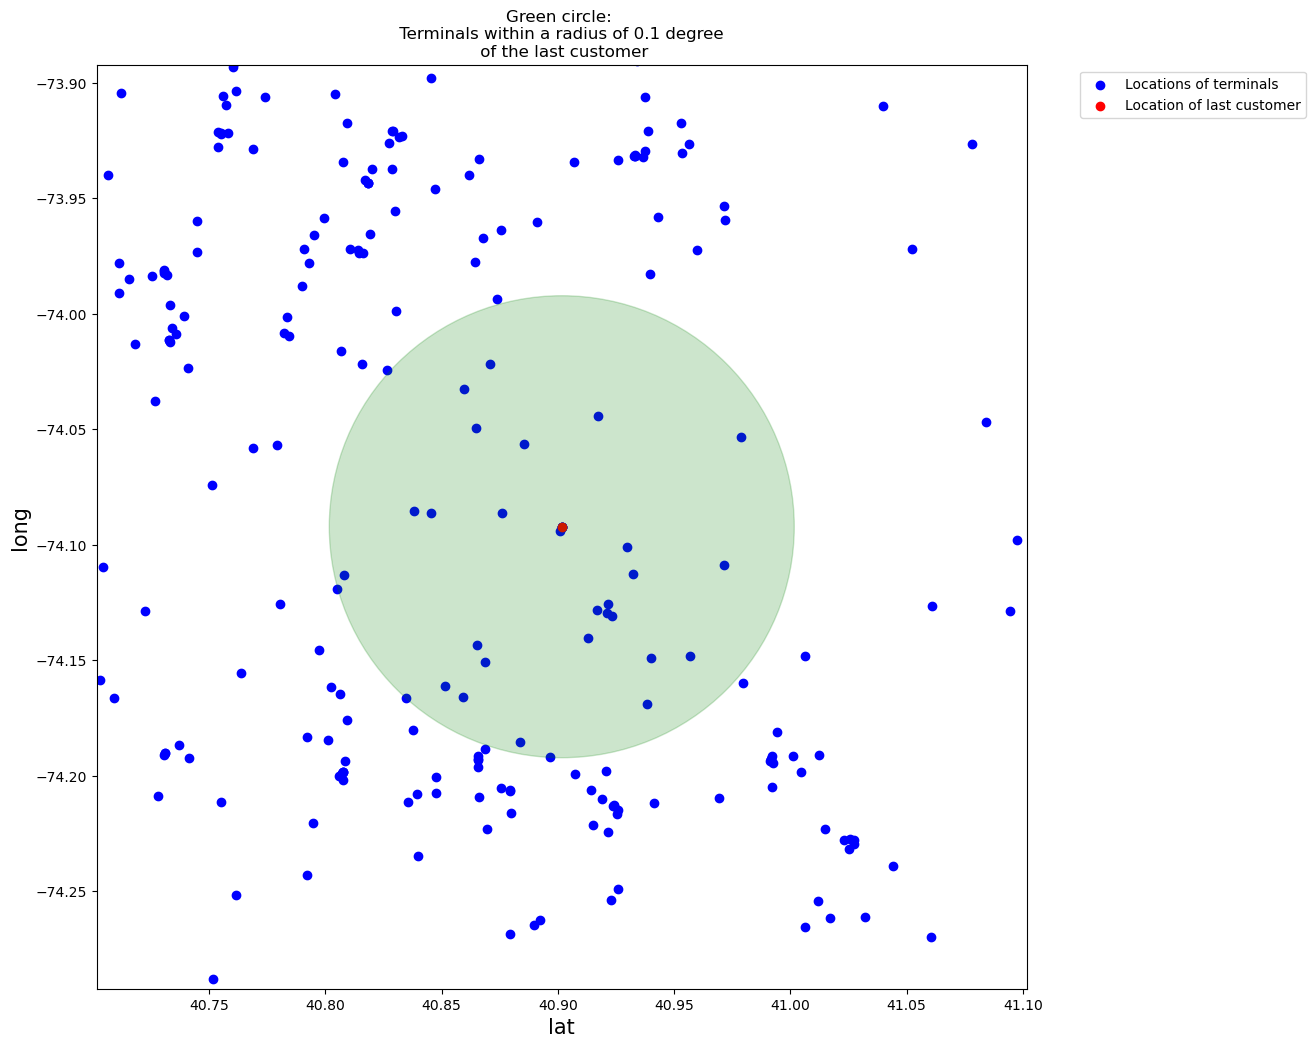

In [93]:
merchants_available_to_customer_fig, ax = plt.subplots(figsize=(12,12))

# Plot locations of terminals
ax.scatter(static_merchants.lat.values, 
           static_merchants.long.values, 
           color='blue', label = 'Locations of terminals')

# Plot location of the last customer
customer_id= 780
ax.scatter(customers.iloc[customer_id].lat, 
           customers.iloc[customer_id].long, 
           color='red',label="Location of last customer")

ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

# Plot the region within a radius of 50 of the last customer
circ = plt.Circle((customers.iloc[customer_id].lat, 
           customers.iloc[customer_id].long), radius=0.1, color='g', alpha=0.2)
ax.add_patch(circ)

fontsize=15

ax.set_title("Green circle: \n Terminals within a radius of 0.1 degree \n of the last customer")
ax.set_xlim([customers.iloc[customer_id].lat-0.2, customers.iloc[customer_id].lat+0.2])
ax.set_ylim([customers.iloc[customer_id].long-0.2,customers.iloc[customer_id].long+0.2])
    
ax.set_xlabel('lat', fontsize=fontsize)
ax.set_ylabel('long', fontsize=fontsize)


Text(0, 0.5, 'long')

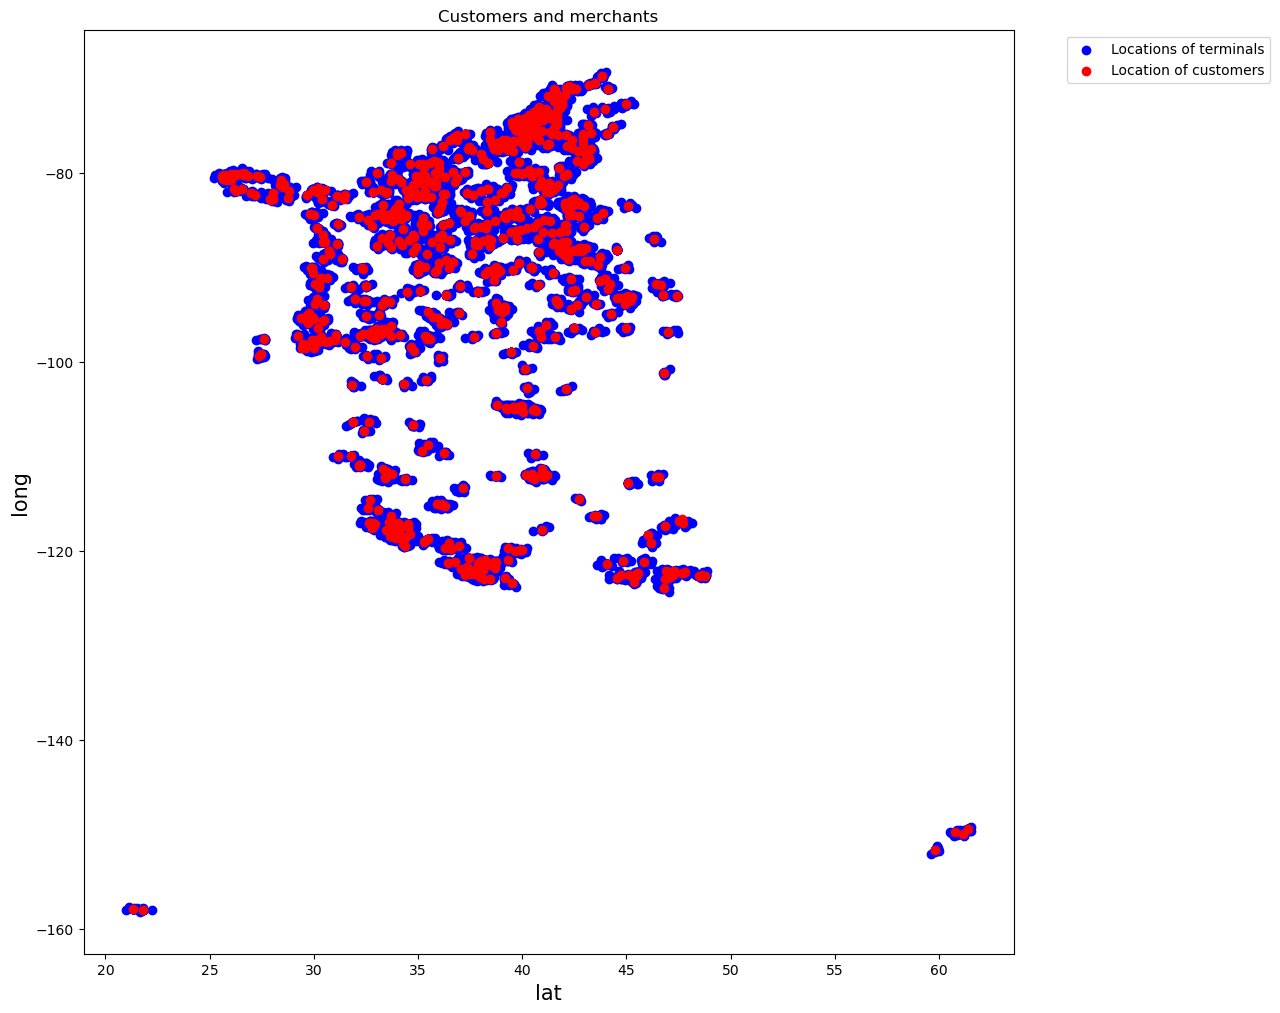

In [94]:
merchants_available_to_customer_fig, ax = plt.subplots(figsize=(12,12))

# Plot locations of terminals
ax.scatter(static_merchants.lat.values, 
           static_merchants.long.values, 
           color='blue', label = 'Locations of terminals')

# Plot location of the last customer

ax.scatter(customers.lat, 
           customers.long, 
           color='red',label="Location of customers")

ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

# Plot the region within a radius of 50 of the last customer
'''circ = plt.Circle((customers.iloc[customer_id].lat, 
           customers.iloc[customer_id].long), radius=0.8, color='g', alpha=0.2)'''
'''ax.add_patch(circ)'''

fontsize=15

ax.set_title("Customers and merchants")
#ax.set_xlim([customers.iloc[customer_id].lat-1, customers.iloc[customer_id].lat+1])
#ax.set_ylim([customers.iloc[customer_id].long-1,customers.iloc[customer_id].long+1])
    
ax.set_xlabel('lat', fontsize=fontsize)
ax.set_ylabel('long', fontsize=fontsize)


In [95]:
files = glob.glob(mypath + "/data/*.csv")
files.remove(mypath+'/data/customers.csv')
files.remove(mypath+"/data/merchants.csv")
files.remove(mypath+"/data/merchants_static.csv")
#files

In [96]:
len(files)

60

In [97]:
# defining an empty list to store 
# content
content = []
  
# checking all the csv files in the 
# specified path
for filename in files:
    
    # reading content of csv file
    # content.append(filename)
    df = pd.read_csv(filename, index_col=None, sep='|')
    content.append(df)
  
# converting content to data frame
df = pd.concat(content)

In [98]:
len(df)

287294

In [100]:
len(df[df.is_fraud == 'x'])/len(df)

0.0027219503365889996

In [103]:
(len(df[df.is_fraud == 1])+len(df[df.is_fraud == '1']))/len(df)

0.0041838673971610965